In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, auc
%config InlineBackend.figure_format='retina'

In [25]:
cdr_df = pd.read_csv("/Users/titipata/Downloads/cdr_result_test.csv")

In [27]:
cdr_df = cdr_df[cdr_df.cdr_preds_score < 1]

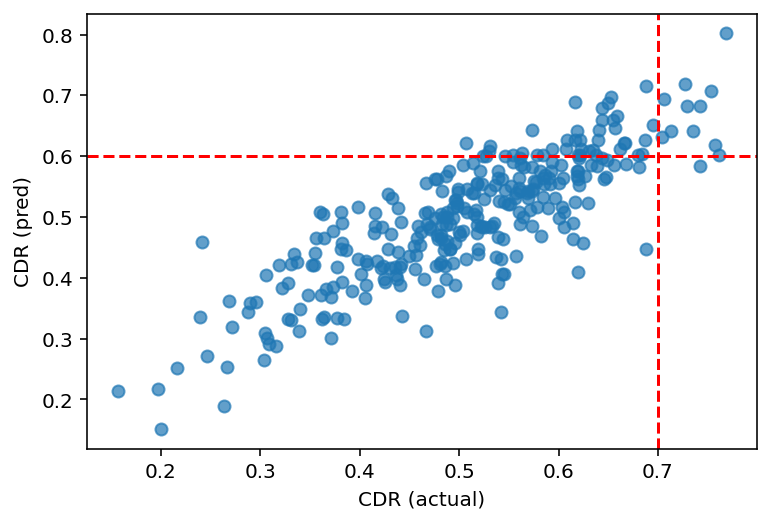

In [35]:
plt.scatter(cdr_df.cdr_labels_score, cdr_df.cdr_preds_score, alpha=0.7)
plt.xlabel("CDR (actual)")
plt.ylabel("CDR (pred)")
plt.axhline(y = 0.6, color = 'r', linestyle = '--') 
plt.axvline(x = 0.7, color = 'r', linestyle = '--') 
plt.show()

Cutoff = 0.5
Cutoff = 0.55
Cutoff = 0.6000000000000001
Cutoff = 0.6500000000000001
Cutoff = 0.7000000000000002
Cutoff = 0.7500000000000002
Cutoff = 0.8000000000000003
Cutoff = 0.8500000000000003
Cutoff = 0.9000000000000004


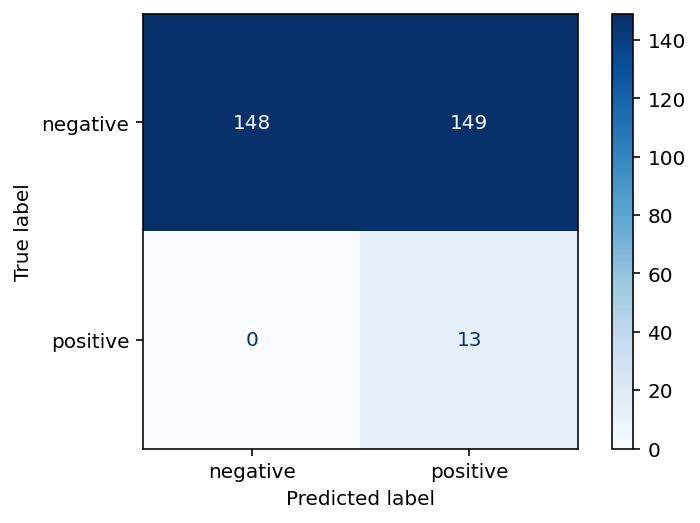

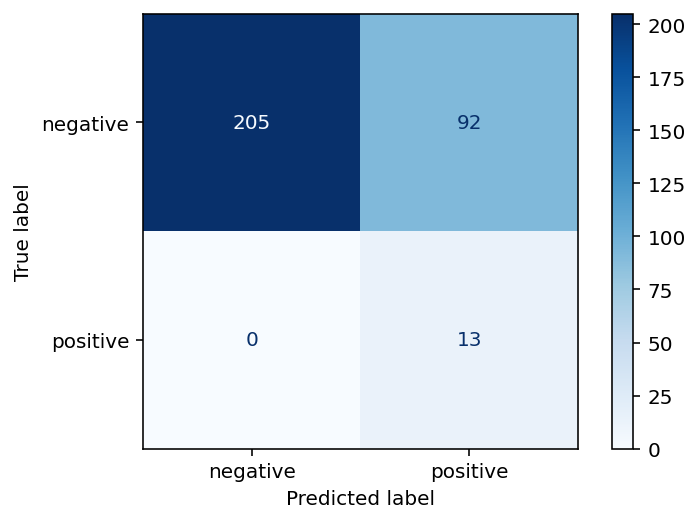

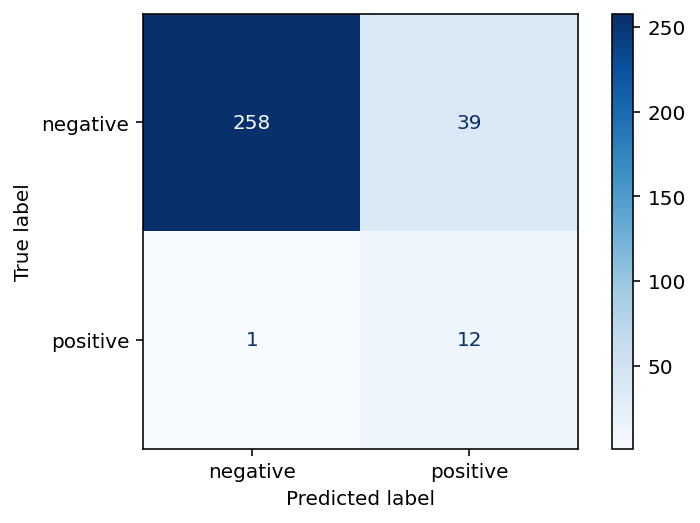

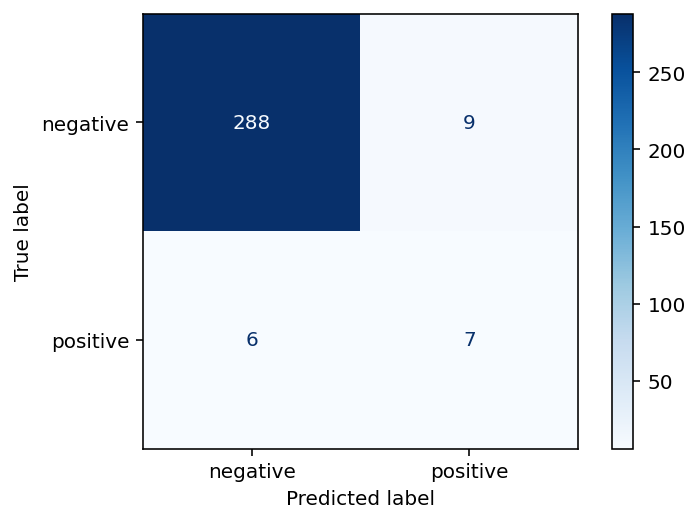

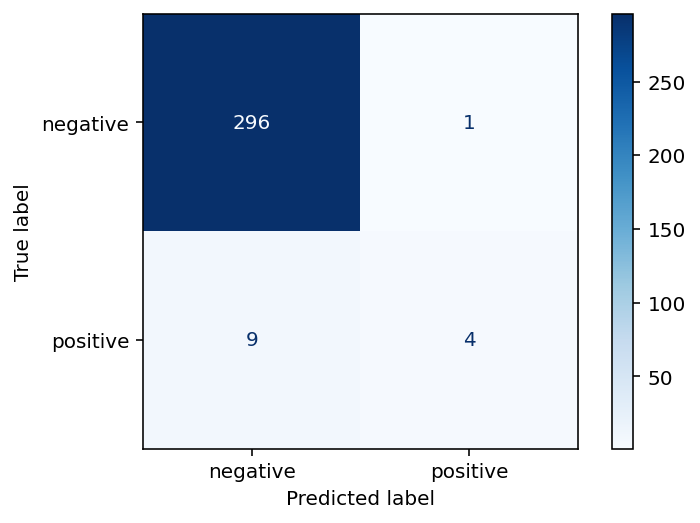

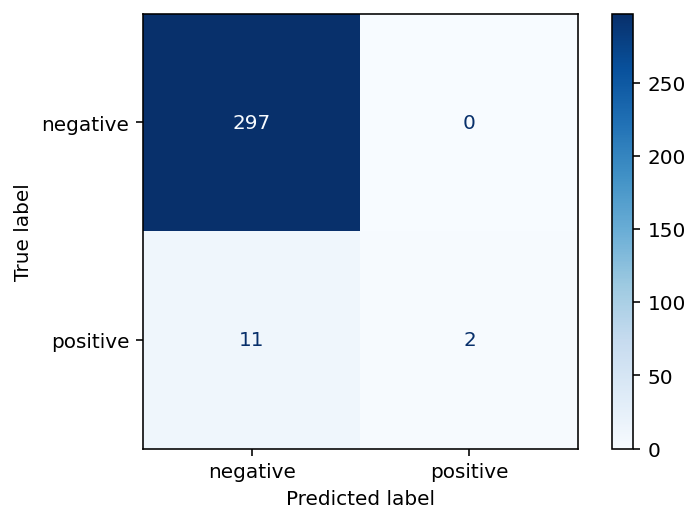

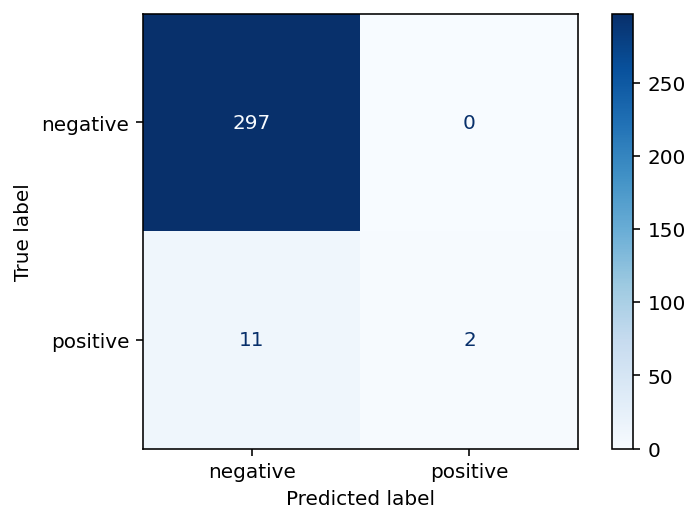

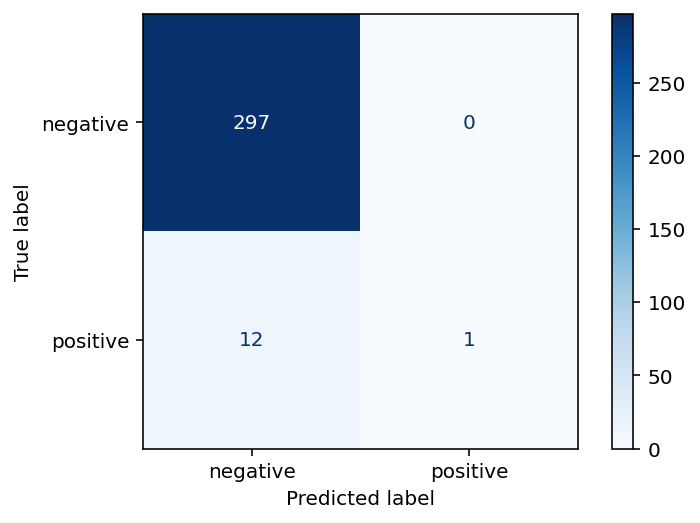

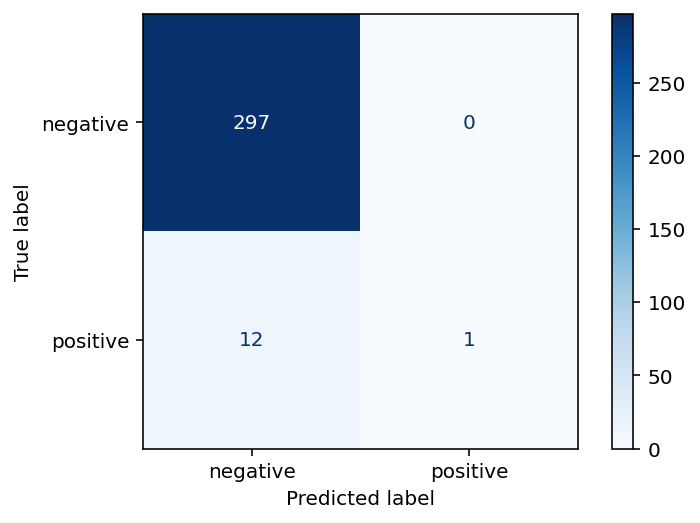

In [23]:
for cutoff in np.arange(0.5, 0.95, 0.05):
    y_pred = (cdr_df.cdr_preds_score >= cutoff).astype(int)
    y_true = (cdr_df.cdr_labels_score >= 0.7).astype(int)
    print(f"Cutoff = {cutoff}")
    # print(precision_recall_fscore_support(y_true, y_pred, average=None))
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["negative", "positive"])
    disp.plot(cmap=plt.cm.Blues)

In [39]:
glaucoma_df = pd.read_csv("/Users/titipata/Downloads/glaucoma_result_test.csv")
glaucoma_df.head()

,image,label,predict,pred_conf
0,./nidek/test/normal/18NN12 (18).jpg,1,1,0.994001
1,./nidek/test/normal/1N1 (1).jpg,1,1,0.999884
2,./nidek/test/normal/6N2 (6).jpg,1,1,0.999542
3,./nidek/test/normal/35N1 (35).jpg,1,1,0.999651
4,./nidek/test/normal/34N4 (34).jpg,1,1,1.000000


In [41]:
glaucoma_df["image"].map(lambda x: x.split("/")[1])

array(['nidek'], dtype=object)

## **Glaucoma prediction**

In [2]:
# use Nidek dataset 
glaucoma_df = pd.read_csv("/Users/titipata/Downloads/nidek_predict.csv")

# use Eidon dataset
# glaucoma_df = pd.read_csv("/Users/titipata/Downloads/edion_predict.csv")

In [3]:
reverse_dict = {1: 0, 0: 1}
glaucoma_df["label"] = glaucoma_df.label.map(lambda x: reverse_dict[x])
glaucoma_df["predict"] = glaucoma_df.predict.map(lambda x: reverse_dict[x])
glaucoma_df["pred_conf"] = 1 - glaucoma_df.pred_conf

In [4]:
y_true = glaucoma_df["label"].values
y_pred_prob = glaucoma_df["pred_conf"].values

In [9]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob, pos_label=1)
y_pred = (y_pred_prob > thresholds[i]).astype(int)

In [7]:
i = 29
precision[i], recall[i], thresholds[i]

(0.8378378378378378, 0.9117647058823529, 0.21522867679595947)

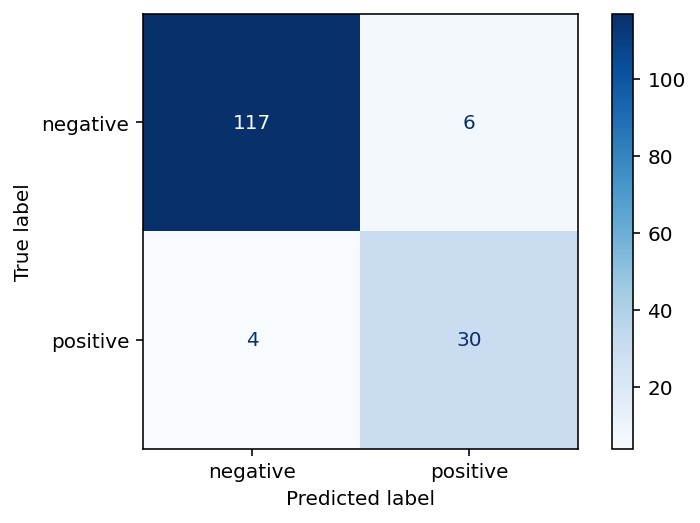

In [10]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["negative", "positive"])
disp.plot(cmap=plt.cm.Blues)

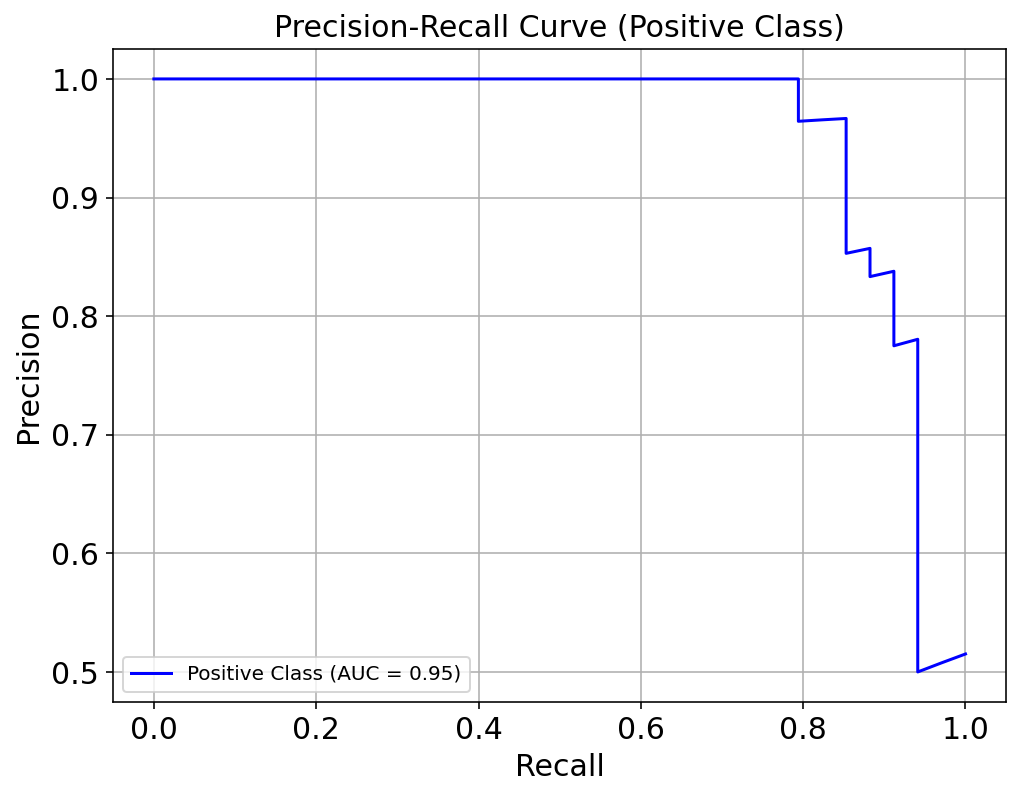

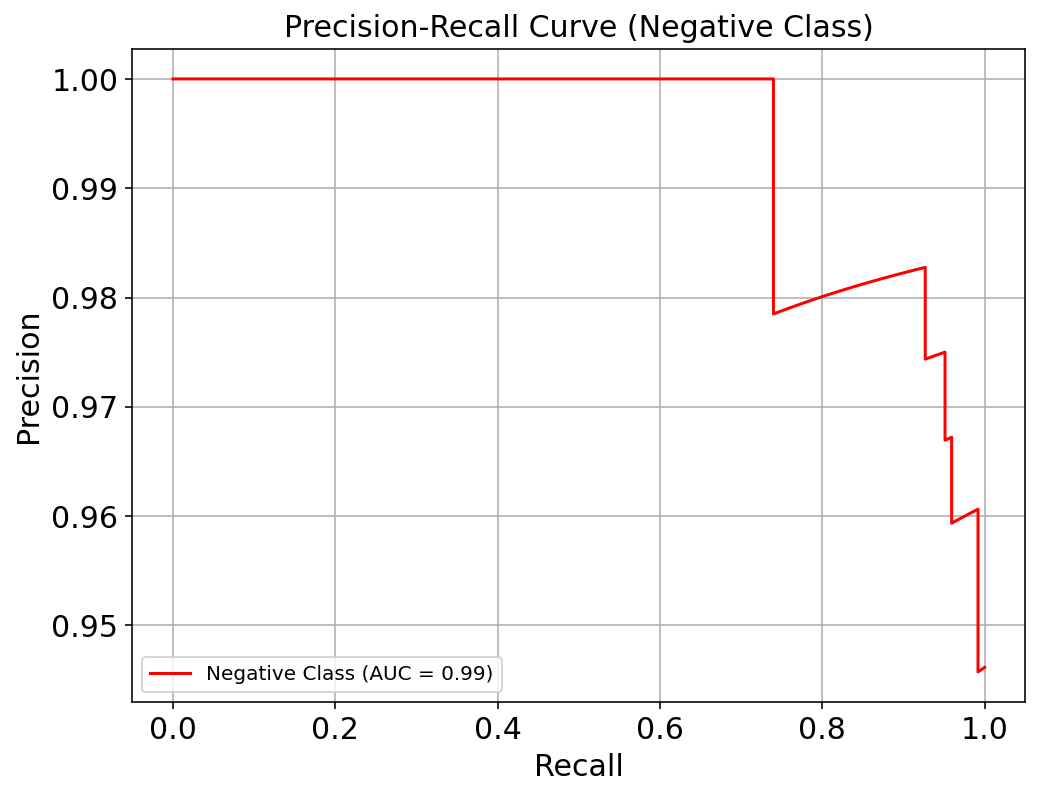

In [15]:
precision_pos, recall_pos, _ = precision_recall_curve(y_true, y_pred_prob)
precision_neg, recall_neg, _ = precision_recall_curve(1 - y_true, 1 - y_pred_prob)

# Calculate area under the curve (AUC) for positive and negative classes
auc_pos = auc(recall_pos, precision_pos)
auc_neg = auc(recall_neg, precision_neg)

# Plot precision-recall curve for positive class
plt.figure(figsize=(8, 6))
plt.plot(recall_pos, precision_pos, label=f'Positive Class (AUC = {auc_pos:.2f})', color='b')
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Precision-Recall Curve (Positive Class)', fontsize=15)
plt.legend(loc='lower left')
plt.grid()
plt.show()

# Plot precision-recall curve for negative class
plt.figure(figsize=(8, 6))
plt.plot(recall_neg, precision_neg, label=f'Negative Class (AUC = {auc_neg:.2f})', color='r')
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Precision-Recall Curve (Negative Class)', fontsize=15)
plt.legend(loc='lower left')
plt.grid()
plt.show()